# ARIMA Models

In this lesson, we introduce ARIMA models. The ARIMA(p,d,q) model incorporates differencing (the 'I' component) along with AR and MA parts to handle non-stationary data.

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  150
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -236.820
Date:                Fri, 28 Mar 2025   AIC                            481.639
Time:                        01:11:01   BIC                            493.655
Sample:                    01-01-2020   HQIC                           486.521
                         - 05-29-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3535      0.338     -1.045      0.296      -1.016       0.309
ar.L2         -0.1428      0.178     -0.804      0.421      -0.491       0.205
ma.L1         -0.2653      0.345     -0.770      0.4

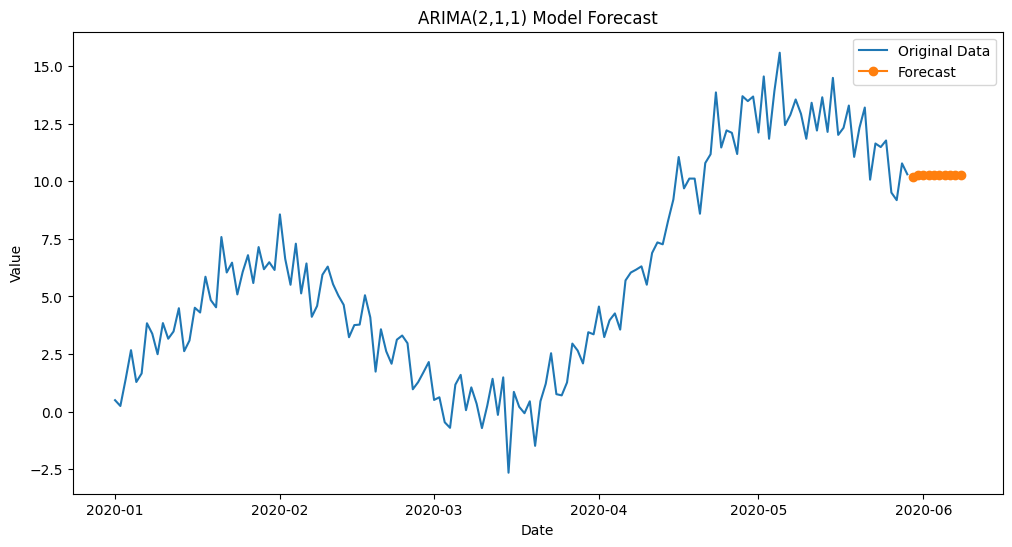

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

%matplotlib inline

# Generate synthetic non-stationary data with a trend
np.random.seed(42)
dates = pd.date_range(start='2020-01-01', periods=150, freq='D')
trend = np.linspace(0, 10, 150)
seasonality = 5 * np.sin(np.linspace(0, 3 * np.pi, 150))
noise = np.random.normal(0, 1, 150)
data = trend + seasonality + noise

ts_df = pd.DataFrame({'Date': dates, 'Value': data}).set_index('Date').asfreq('D')

# Fit an ARIMA(2,1,1) model (d=1 for differencing)
model = ARIMA(ts_df['Value'], order=(2, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

# Forecast the next 10 steps
forecast = model_fit.forecast(steps=10)
print('\nForecast:')
print(forecast)

# Plot the original data and forecast
plt.figure(figsize=(12,6))
plt.plot(ts_df, label='Original Data')
plt.plot(forecast.index, forecast, label='Forecast', marker='o')
plt.title('ARIMA(2,1,1) Model Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

## Conclusion

ARIMA models allow us to handle non-stationary data effectively by applying differencing before modeling.